In [29]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/PedroFGN1/lia1-2023-1/main/Aula%2012%20-%20An%C3%A1lise%20Explorat%C3%B3rio%20Dados/dataset.csv')

In [31]:
# Tamanho do dateframe
df.shape

(9700, 11)

In [32]:
# Amostra do dataframe - 5 primeiros itens
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [33]:
# Amostra de últimas linhas do dataframe
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


In [34]:
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [35]:
# Títulos das colunas
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [36]:
# Tipos das colunas
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [37]:
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [38]:
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

# **Pergunta 01**

# > Qual a cidade com o maior valor total de vendas de produtos da categoria 'Office Supplies'?



In [39]:
df_pl = df[df['Categoria'] == 'Office Supplies']

In [40]:
df_pl_total = df_pl.groupby('Cidade')['Valor_Venda'].sum()

In [41]:
cidade_maior_venda = df_pl_total.idxmax()
print("cidade com maior valor de venda para 'Office Supplies':", cidade_maior_venda)

cidade com maior valor de venda para 'Office Supplies': New York City


# **Pergunta 2**

# Qual o total de vendas por data do pedido? Demonstre o resultado em um gráfico de barras

In [44]:
# Calcula o total de vendas para cada data de pedido
df_p2 = df.groupby('Data_Pedido')['Valor_Venda'].sum()

In [48]:
# Visualiza a quantidade de vendas por data
df_p2.shape

(1226,)

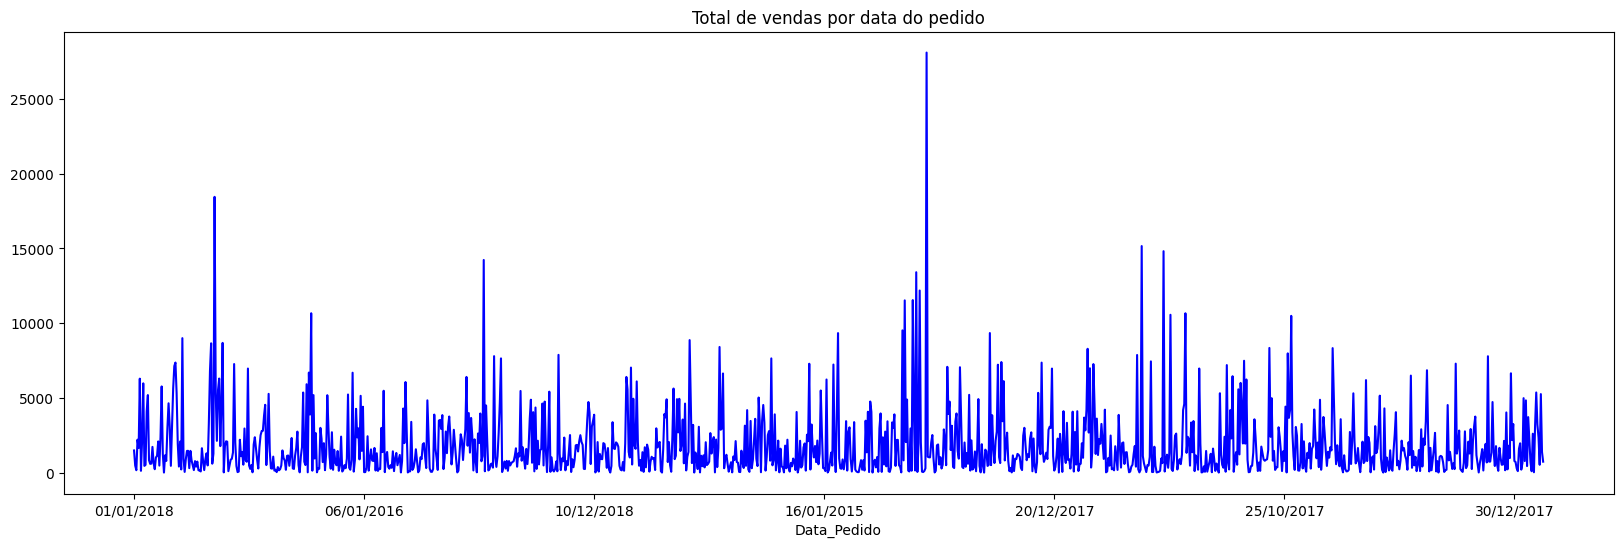

In [47]:
# Gráfico com a rsposta
plt.figure(figsize = (20,6))
df_p2.plot( x = 'Data_Pedido',
            y = 'Valor_Venda',
            color = 'blue')
plt.title('Total de vendas por data do pedido')
plt.show()

# **Pergunta 3**

# Calcule o total de vendas por estado?

In [50]:
# Agrupa por Estado e calcula o total de vendas
df_p3 = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

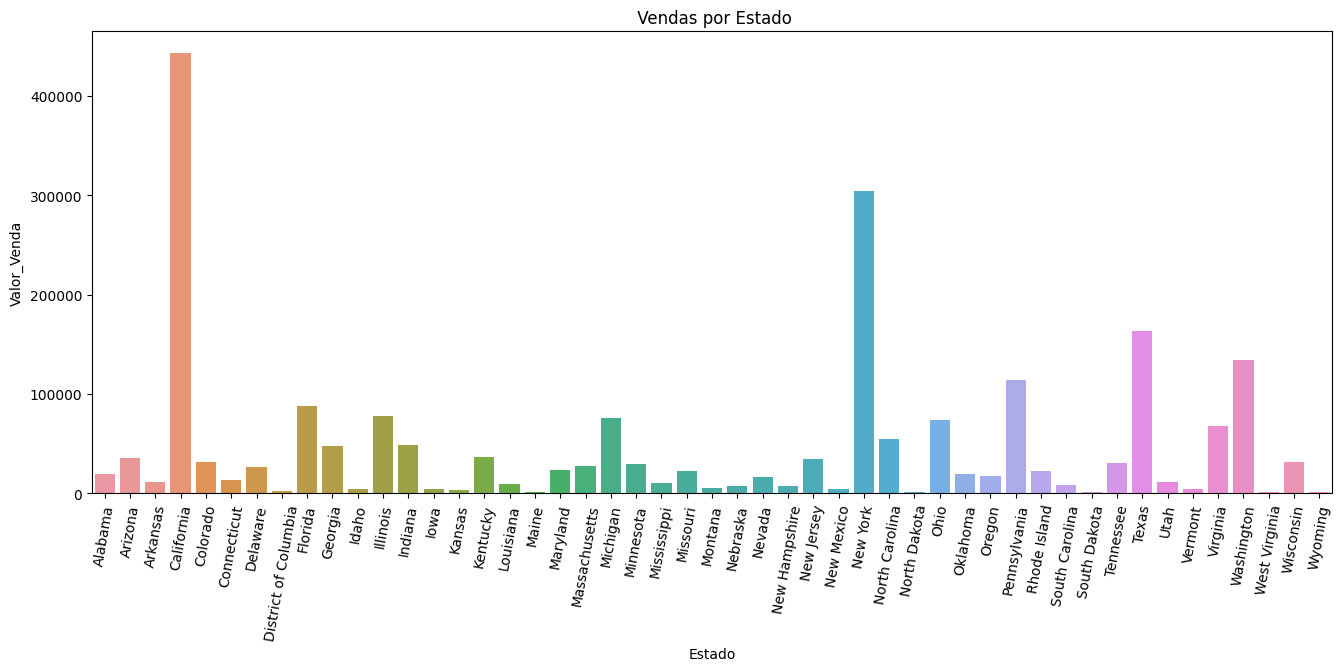

In [65]:
# Gráfico com a resposta
plt.figure(figsize=(16,6))
sns.barplot(data= df_p3,
        y = 'Valor_Venda',
        x = 'Estado').set(title = ' Vendas por Estado')
  
plt.xticks(rotation = 80)
plt.show()

# **Pergunta 4**

# Identifique as 10 cidades com maior total de vendas e demonstre o resultado através de um gráfico de barras

In [67]:
df_p4 = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',ascending = False).head(10)

In [68]:
df_p4.head(10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


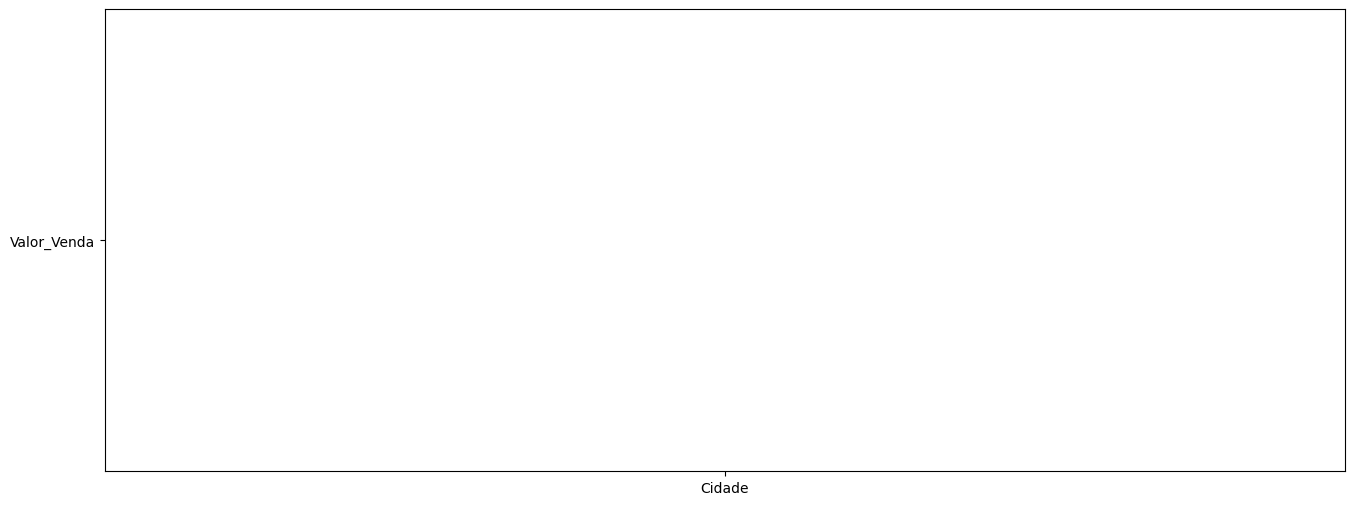

In [75]:
plt.figure(figsize = (16,6))

plt.bar('Cidade', 'Valor_Venda',color="red", width=1)
plt.show()

# **Pergunta 5**

# Identifique qual seguimento teve o maior total de vendas e demonstre o resultado através de um gráfico de pizza.

In [69]:
df_p5 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)

In [70]:
df_p5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [80]:
def autopet_format(values):
  def my_format(pet) :
    total = sum(values)
    val = int(round(pet * total)/100.00)
    return '$ (v:d)'.format(v = val)
    return my_format

In [85]:
plt.figure(figsize = (16,6))
plt.pie(df_p5['Valor_Venda'],
        labels = df_p5['Segmento'],
        autopet = autopet_format(df_p5['Valor_Venda']),
        startangle=90)

plt.show()

TypeError: ignored

<Figure size 1600x600 with 0 Axes>